#### Using the image captioning model to make predictions

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [52]:
root = "../datasets/Image Captioning/"

In [53]:
with open(root + "images_features.pkl", "rb") as f:
    features = pickle.load(f)

with open(root + "word_to_ix.pkl", "rb") as f:
    words_to_index = pickle.load(f)

with open(root + "ix_to_word.pkl", "rb") as f:
    index_to_words = pickle.load(f)

model = load_model('../models/image_captioning/full_models/model_10.h5')

images = root + "Images/"
max_length = 33

In [54]:
def Image_Caption(picture):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [words_to_index[w] for w in in_text.split() if w in words_to_index]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([picture,sequence], verbose=False)
        yhat = np.argmax(yhat)
        word = index_to_words[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final[:final.index(".") + 1]

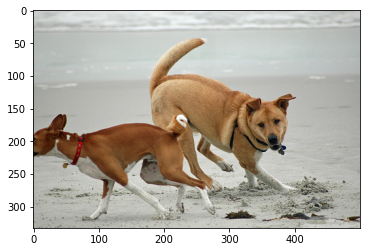

Caption: dog is running through the grass with stick in its mouth and another dog is running in the background .


In [55]:
z = 20
pic = list(features.keys())[z]
image = features[pic].reshape((1,2048))
x = plt.imread(images+pic)
plt.imshow(x)
plt.show()
print("Caption:", Image_Caption(image))

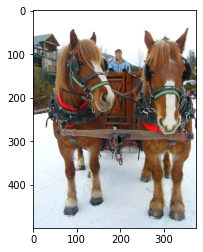

Caption: in cart with two dogs in the snow .


In [56]:
z = 75
pic = list(features.keys())[z]
image = features[pic].reshape((1,2048))
x = plt.imread(images+pic)
plt.imshow(x)
plt.show()
print("Caption:", Image_Caption(image))